In [1]:
%pylab inline
import cv2
import numpy as np
import os
import dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = dataset.Dataset.load('PLCO2')

In [3]:
def ocv_needs_rotation(im):
    out = cv2.inRange(im, 50, 150)
    out = cv2.dilate(out, np.ones((5, 5), np.uint8), iterations=2)
    img, ctrs, hier = cv2.findContours(out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    new_ctrs = []
    for ctr in ctrs:
        area = cv2.contourArea(ctr)
        bad = False
        if area < 500 or area > 10000:
            bad = True
        for pt in ctr:
            if pt[0][0] < 5 or pt[0][1] < 5 or pt[0][0] > 250 or pt[0][1] > 250:
                bad = True
        if not bad:
            new_ctrs.append(ctr)
    ctrs = sorted(new_ctrs, key=lambda ctr: -cv2.contourArea(ctr))
    if len(ctrs) >= 2:
        M = cv2.moments(ctrs[0])
        cx1 = int(M['m10'] / M['m00'])
        cy1 = int(M['m01'] / M['m00'])
        M = cv2.moments(ctrs[1])
        cx2 = int(M['m10'] / M['m00'])
        cy2 = int(M['m01'] / M['m00'])
        deltax = abs(cx1-cx2)
        deltay = abs(cy1-cy2)
        return (deltay > deltax)
    
    return False

In [4]:
count = 0
total = 0
before_rotation = []
after_rotation = []

for idx, image in enumerate(data.features):
    rsh = image.reshape((256, 256))
    im = rsh / (image.max() / 256)
    print(image.max())
    print(im.max())
    if ocv_needs_rotation(im):
        fix = np.rot90(rsh, k=3)
        data.features[idx] = fix.flatten()
        before_rotation.append(rsh)
        after_rotation.append(fix)
        count += 1
    total += 1
    
print("Total processed: {}. Rotated: {}.".format(total, count))

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0590981918059
256.0
0.0590981918059
256.0
0.0590981918059
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.0587167162585
256.0
0.05871671

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan


In [ ]:
data.name = 'PLCO2Rot'
data.save()

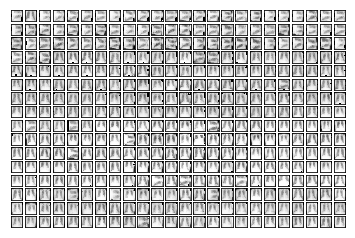

In [5]:
fig = plt.figure()
for idx, image in enumerate(before_rotation[:384]):
    ax = fig.add_subplot(16, 24, idx+1)
    f = plt.imshow(image, cmap=cm.gray)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)

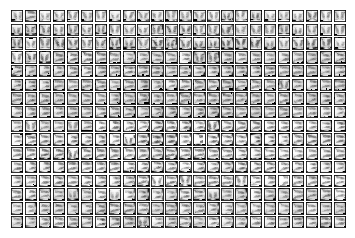

In [6]:
fig = plt.figure()
for idx, image in enumerate(after_rotation[:384]):
    ax = fig.add_subplot(16, 24, idx+1)
    f = plt.imshow(image, cmap=cm.gray)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)